<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Salcán Castillo Shirley Michell

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
import miningscience as msc

help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    La función download_pubmed recibe un argumento, que corresponde a palabras claves con las cuales se realizará una búsqueda 
    en Pubmed y  retorna la búsqueda en la base de datos antes nombrada, tal cual una descarga tipo PubMed.
    keyword: son palabras claves de búsqueda

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)
    La función mining_pubs recibe dos argumentos, que corresponde al tipo de minado de datos que se desea y el documento del 
    cual se va a extraer los datos.
    Tipo: puede ser DP, AU o AD.
           "DP" --> recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
           "AU" --> recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
           "AD" -->recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.
    Archi


## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [2]:
import re
a=msc.download_pubmed('Ecuador genomics[title/abstract]')
b=re.findall(r'[DIMP]{4}\-.*\d\n',a)
print ('El número de artículos es: ', len(b))
print ('El PMID del primero artículo es: ',b[0])

El número de artículos es:  55
El PMID del primero artículo es:  PMID- 35120121



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [4]:
print ('DataFrames de pub_year')
l=msc.mining_pubs('DP',a)
print(l.head(2))
print(l.tail(2))
print ('DataFrames de pub_authors')
k2=msc.mining_pubs('AU',a)
print(k2.head(2))
print(k2.tail(2))
print ('DataFrames de countries')
j=msc.mining_pubs('AD',a)
print(j.head(2))
print(j.tail(2))

DataFrames de pub_year
        PMID DP_year
0   35120121    2022
1   35064679    2022
         PMID DP_year
53   19844075    2010
54   19018989    2008
DataFrames de pub_authors
        PMID  num_auth
0   35120121        14
1   35064679         7
         PMID  num_auth
53   19844075         2
54   19018989         7
DataFrames de countries
     Country  num_auth
0    Austria         8
1  Australia        23
         Country  num_auth
57         Samoa         1
58  South Africa         5


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


LITERAL A: GRÁFICA DE DISTRIBUCIÓN NORMAL
La lista de conteo artículos por año es : [7, 1, 1, 16, 1, 8, 4, 8, 1, 5, 2, 1]
El promedio es:  4.583333333333333
La desviación estándar es:  4.386690729417285


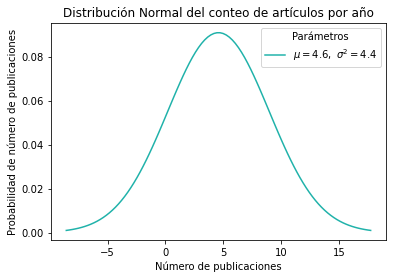

LITERAL B: GRÁFICA DE BOXPLOT


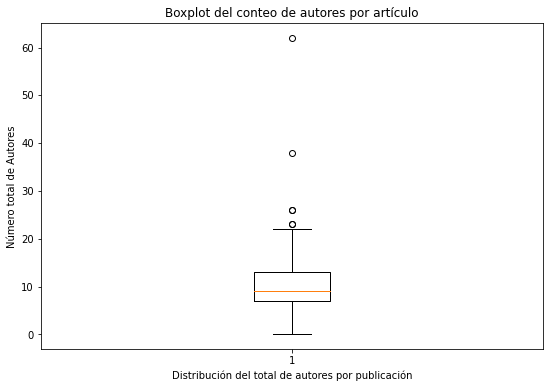

LITERAL C: GRÁFICA DE NUBES


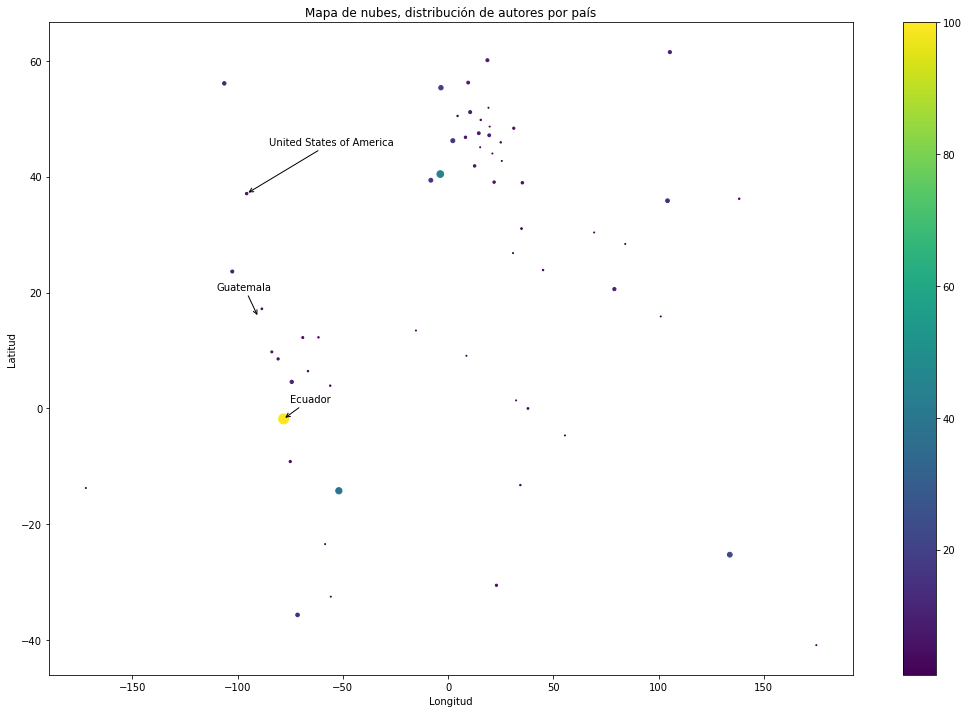

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv as csv

#Gráfica de Distribución Normal (pubyear)
print ('LITERAL A: GRÁFICA DE DISTRIBUCIÓN NORMAL')
i = l.iloc[:,1]
s = pd.Series(i)
h = list(set(s))
g=s
f=h
h=[0]*len(f)
k=0
for elem in f:
    d=0
    for comp in g:
        if elem == str(comp):
            d=d+1
    h[k]=d
    k=k+1
print ('La lista de conteo artículos por año es :',h)
mean = np.average(h)
print ('El promedio es: ',mean)
stan = np.std(h)
print ('La desviación estándar es: ',stan)
x = np.linspace(mean - 3*stan, mean + 3*stan, 100)
sigma = stan
label = '$\mu = %.1f, \ \sigma^2=%.1f$' %(mean, stan)
y_norm = stats.norm.pdf(x, mean, sigma)
plt.plot(x, y_norm, label=label, c = 'lightseagreen')
plt.xlabel('Número de publicaciones')
plt.ylabel('Probabilidad de número de publicaciones')
plt.title('Distribución Normal del conteo de artículos por año')
plt.legend(title = "Parámetros")
plt.show()

#Gráfica de Boxplot (pub_authors)
print ('LITERAL B: GRÁFICA DE BOXPLOT')
i = k2.iloc[:,1]
s = pd.Series(i)
s1 = s.tolist()
#s1.pop(79) #Eliminamos el dato atípico
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(s1)
plt.xlabel('Distribución del total de autores por publicación')
plt.ylabel('Número total de Autores')
plt.title('Boxplot del conteo de autores por artículo')
plt.show()

#Gráfica de Nubes (countries)
print ('LITERAL C: GRÁFICA DE NUBES')
iu= j.iloc[:,0]
su=pd.Series(iu)
i = j.iloc[:,1]
sa = pd.Series(i)
s = sa.tolist()
zip_coordinates = {}
with open('Data/countries.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['name']] = [float(row['latitude']),
                                           float(row['longitude'])]
code = []
long = []
lat = []
count = s
for inte in su:
    if inte in zip_coordinates.keys():
        code.append(inte)
        lat.append(zip_coordinates[inte][0])
        long.append(zip_coordinates[inte][1])
plt.scatter(long, lat, s = count, c= count)
plt.colorbar()
ard = dict(arrowstyle="->")
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-75.25, 1), arrowprops = ard)
plt.annotate('Guatemala', xy = (-90.230759, 15.783471), 
               xytext = (-110, 20.4292), arrowprops= ard)
plt.annotate('United States of America', xy = (-95.712891, 37.09024), 
               xytext = (-85.1106, 45.3736), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de nubes, distribución de autores por país')
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

#### Distribución Normal del conteo de artículos por año

El número de publicaciones cuya palabra clave sea "Ecuador genomics" es baja, sin embargo tal como se observa en la Fig. 01 la media de publicaciones fue de aproximadamente de 4.6, lo cual en base a la gráfica de distribución normal tiene la mayor probabilidad 0.09. A partir, de la gráfica de distribución normal se infiere que la probabilidad de publicar 0 artículo cuyas palabras claves sean "Ecuador genomics" en el título y abstract es de 0.06. Mientras que la probabilidad de que se publiquen 15 artículos es de 0.01. Además las probabilidades son bajas debido a la escases de publicaciones con esta palabra clave.

#### Boxplot del conteo de autores por artículo

La Fig. 02 muestra la media de autores por artículo que corresponde a 10 personas, sin embargo los circulos negros representan la distribución de números de autores que van desde 1 hasta aproximadamente 62 autores.

#### Mapa de nubes distribucion de autores por país

Se distribuyó las direcciones de cada autor por país esto facilitó la realización de un mapa de distribución de paises donde se observa que Ecuador es uno de los paises más nombrados en las direcciones y posiblemente es el país con el mayor número de autores. De igual forma se observa una gran gama de diversidad de autores tanto en el continente Americano como en el Europeo y Africano. 


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

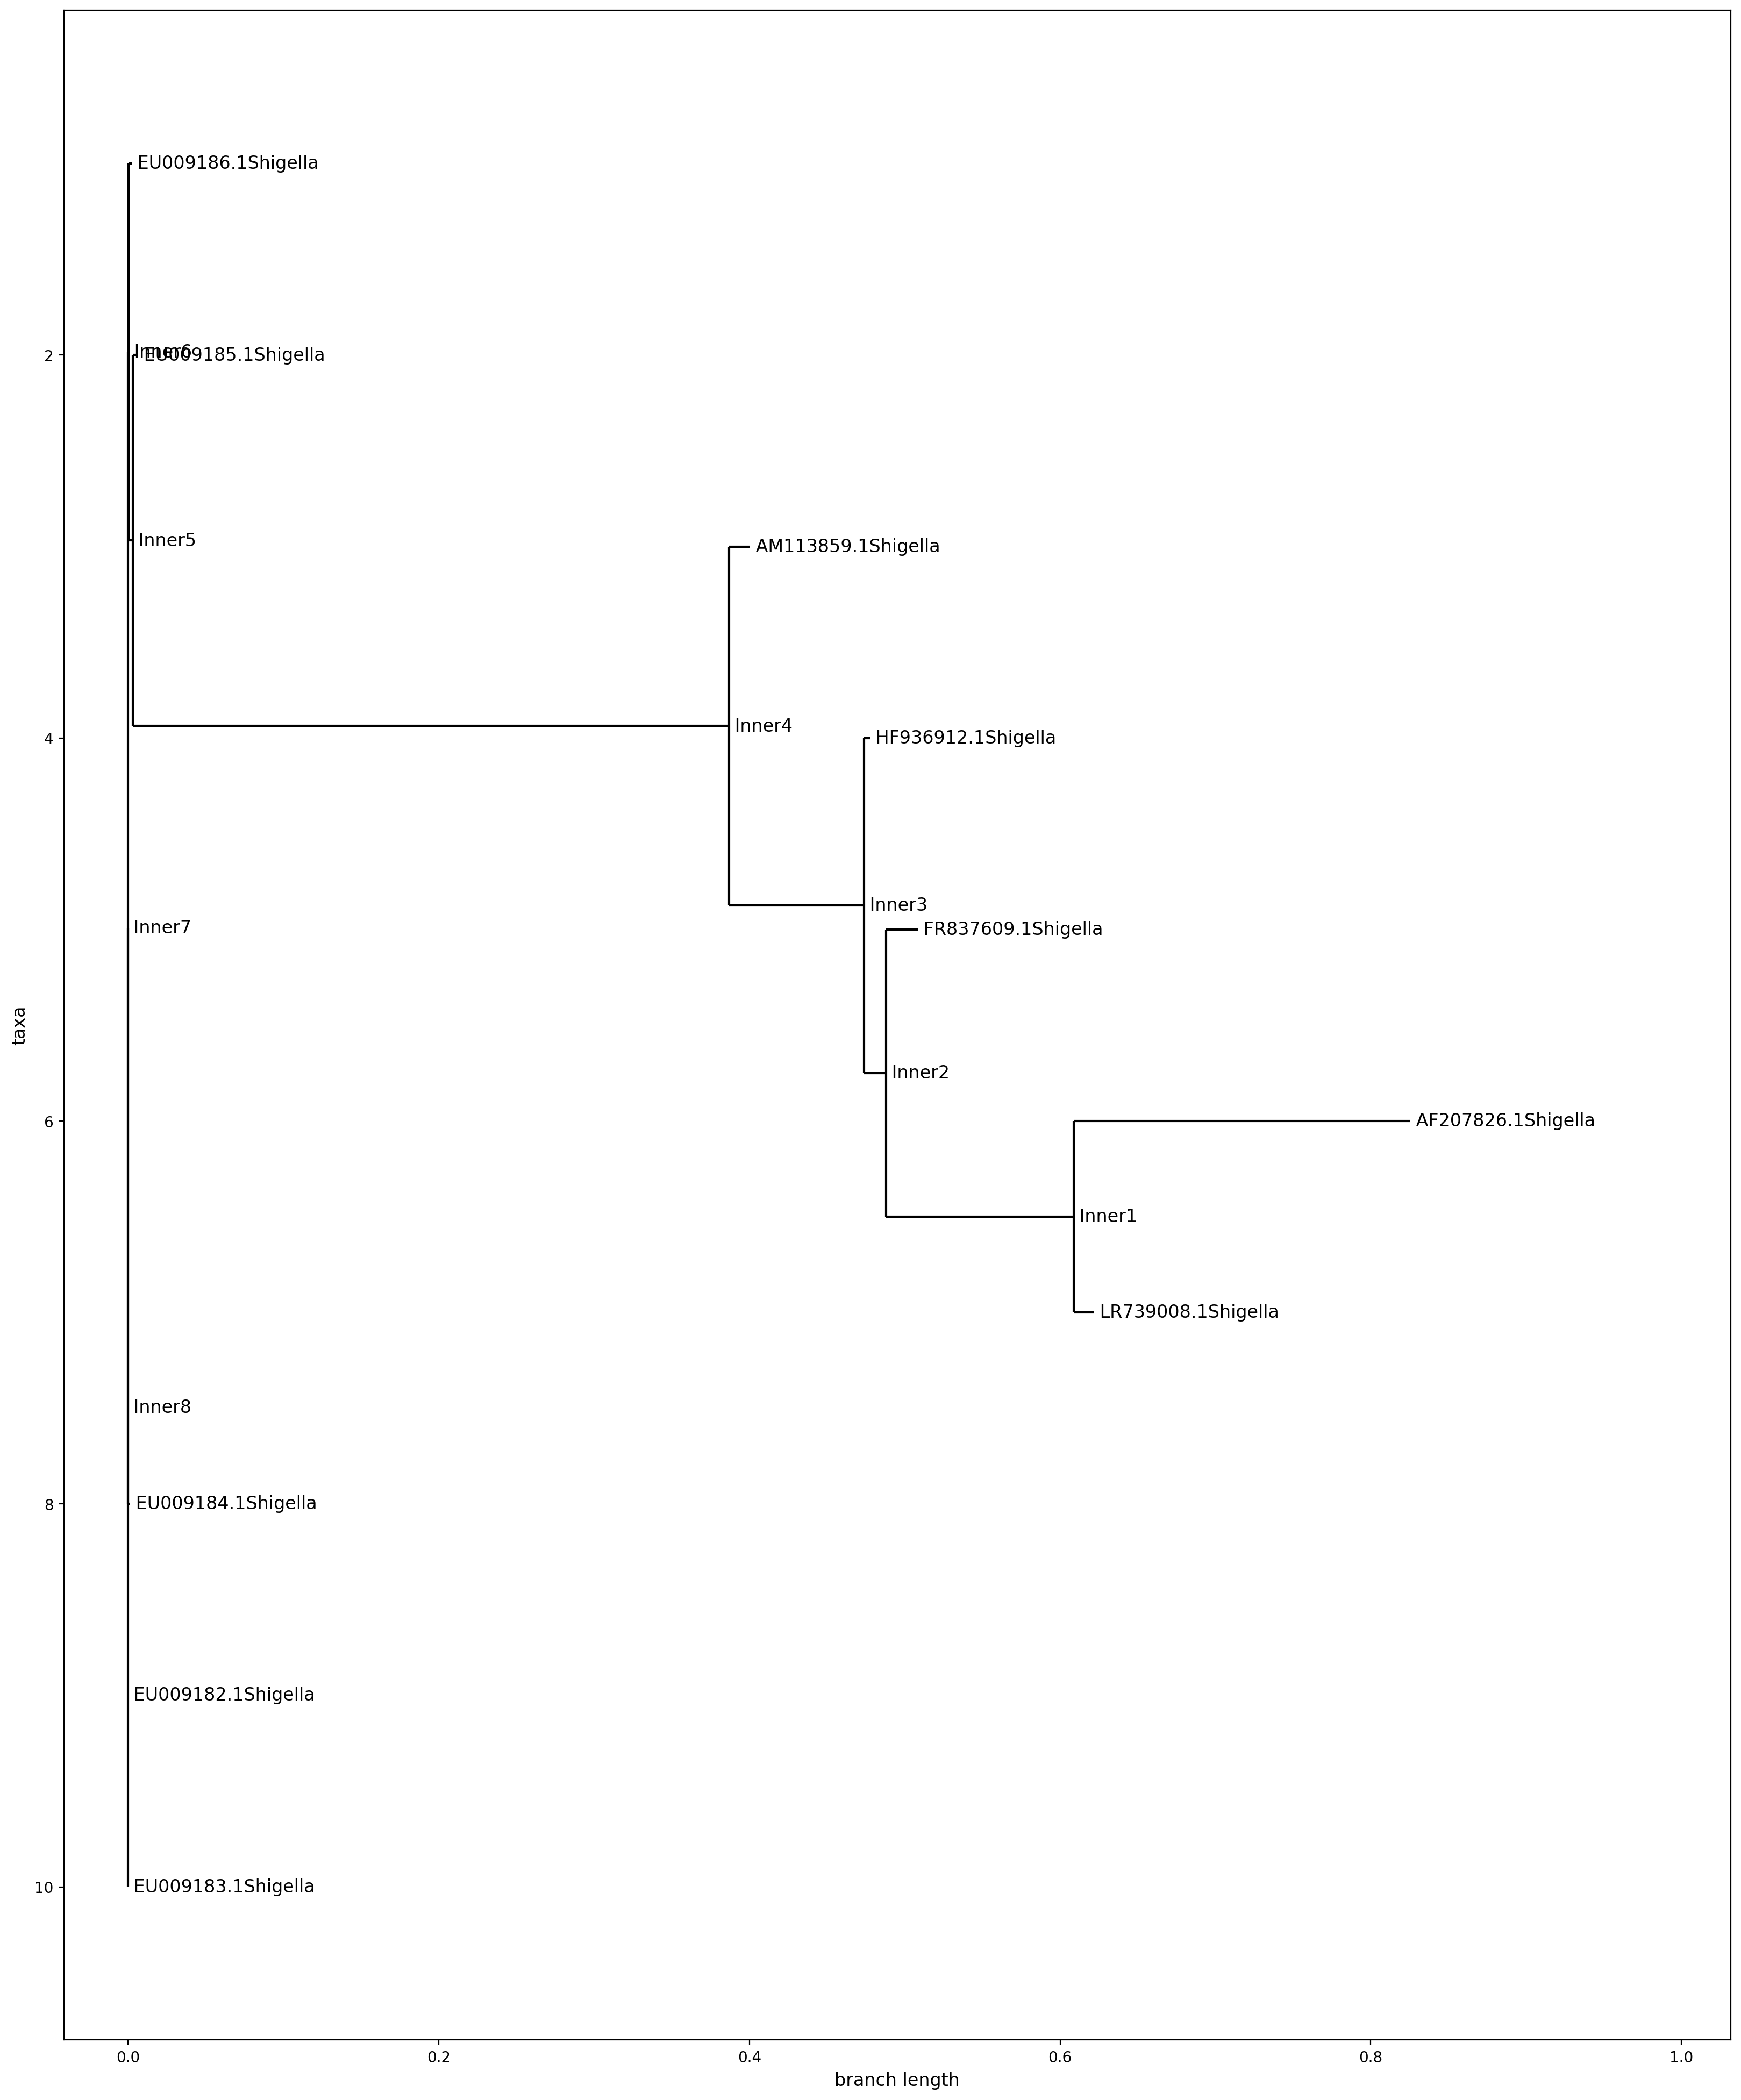

In [12]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt

with open("Data/sequence(2).seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 10:
            ListID.append(line)
            a=a+1

Entrez.email = "salcanshirley1b@gmail.com" 
ofile=open('Data/SequenceD.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
ffile=open('Data/SequenceD.fasta','w')
with open("Data/SequenceD.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/SequenceD.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/SequenceD.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)

**Interpretración del árbol filogenético**

Shigella dysenteriae es una bacteri con forma de bacilo que es parte de la flora gastrointestinal nomal sin emabrgo puede causar shigellosis, esta infeccion es conocida como disentería y se produce por la inflacion del instestino, que produce una diarrea grave con presencia en las heces, sangre o pus. 
La Fig. 04 demuestra el abrol filogenético de 10 cepas de Shigella, y tal como se puede observar la cepa EU009186.1, EU009185.1, EU009184.1, EU009182.1 y EU009183.1, son semejantes entre si es por ello que no existe distancia horizontal máxima de la raíz del arbol. Mientras, la cepa AM113859.1 difiere demasiado de las cepas EU por lo cual se encuetra a una distancio horizontal más lejana, de esta misma horizontal se genera una rama, donde se encuentran las cepas HF936912.1 y FR837609.1, las cuales no difieren de manera abrupta. Además, de esta ultima se desplegan las dos ultimas cepas AF207826.1 y LR739008.1

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 
